### 1. Importowanie bibliotek i sprawdzanie danych

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('dane/Dataset_spine.csv')

In [3]:
df.head()

Col1                     Col2                    Col3  \
0  pelvic_incidence              pelvic_tilt   lumbar_lordosis_angle   
1   zasieg_miednicy  przekrzywienie_miednicy  kat_lordozy_ledzwiowej   
2        63.0278175              22.55258597             39.60911701   
3       39.05695098              10.06099147             25.01537822   
4       68.83202098              22.21848205             50.09219357   

                      Col4               Col5  \
0             sacral_slope      pelvic_radius   
1  przekrzywienie_krzyzowe  promien_miedznicy   
2              40.47523153        98.67291675   
3              28.99595951        114.4054254   
4              46.61353893        105.9851355   

                              Col6                 Col7  \
0         degree_spondylolisthesis         pelvic_slope   
1  stopien_zwyrodnienia_kregoslupa  nachylenie_miednicy   
2                     -0.254399986          0.744503464   
3                      4.564258645          0.415185678   
4                     -3.530317314          0.474889164   

                          Col8                      Col9  \
0                  Direct_tilt            thoracic_slope   
1  bezposrednie_przekrzywienie  przekrzywienie_piersiowe   
2                      12.5661                   14.5386   
3                      12.8874                   17.5323   
4                      26.8343                   17.4861   

                   Col10         Col11                Col12  \
0          cervical_tilt  sacrum_angle      scoliosis_slope   
1  przekrzywienie_szyjne  kat_krzyzowy  nachylenie_skoliozy   
2               15.30468    -28.658501              43.5123   
3               16.78486    -25.530607              16.1102   
4               16.65897    -29.031888              19.2221   

                          Class_att  \
0        Class_att(Abnormal Normal)   
1  Klasa(prawidłowa Nieprawidłowa)    
2                          Abnormal   
3                          Abnormal   
4                          Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                               Opis  
2                                                NaN  
3                                                NaN  
4  Prediction is done by using binary classificat...

In [4]:
df.loc[1]

Col1                            zasieg_miednicy
Col2                    przekrzywienie_miednicy
Col3                     kat_lordozy_ledzwiowej
Col4                    przekrzywienie_krzyzowe
Col5                          promien_miedznicy
Col6            stopien_zwyrodnienia_kregoslupa
Col7                        nachylenie_miednicy
Col8                bezposrednie_przekrzywienie
Col9                   przekrzywienie_piersiowe
Col10                     przekrzywienie_szyjne
Col11                              kat_krzyzowy
Col12                       nachylenie_skoliozy
Class_att      Klasa(prawidłowa Nieprawidłowa) 
Unnamed: 13                                Opis
Name: 1, dtype: object

In [5]:
df.columns = list(df.loc[1])

In [6]:
df.head()

zasieg_miednicy  przekrzywienie_miednicy  kat_lordozy_ledzwiowej  \
0  pelvic_incidence              pelvic_tilt   lumbar_lordosis_angle   
1   zasieg_miednicy  przekrzywienie_miednicy  kat_lordozy_ledzwiowej   
2        63.0278175              22.55258597             39.60911701   
3       39.05695098              10.06099147             25.01537822   
4       68.83202098              22.21848205             50.09219357   

   przekrzywienie_krzyzowe  promien_miedznicy  \
0             sacral_slope      pelvic_radius   
1  przekrzywienie_krzyzowe  promien_miedznicy   
2              40.47523153        98.67291675   
3              28.99595951        114.4054254   
4              46.61353893        105.9851355   

   stopien_zwyrodnienia_kregoslupa  nachylenie_miednicy  \
0         degree_spondylolisthesis         pelvic_slope   
1  stopien_zwyrodnienia_kregoslupa  nachylenie_miednicy   
2                     -0.254399986          0.744503464   
3                      4.564258645          0.415185678   
4                     -3.530317314          0.474889164   

   bezposrednie_przekrzywienie  przekrzywienie_piersiowe  \
0                  Direct_tilt            thoracic_slope   
1  bezposrednie_przekrzywienie  przekrzywienie_piersiowe   
2                      12.5661                   14.5386   
3                      12.8874                   17.5323   
4                      26.8343                   17.4861   

   przekrzywienie_szyjne  kat_krzyzowy  nachylenie_skoliozy  \
0          cervical_tilt  sacrum_angle      scoliosis_slope   
1  przekrzywienie_szyjne  kat_krzyzowy  nachylenie_skoliozy   
2               15.30468    -28.658501              43.5123   
3               16.78486    -25.530607              16.1102   
4               16.65897    -29.031888              19.2221   

   Klasa(prawidłowa Nieprawidłowa)   \
0        Class_att(Abnormal Normal)   
1  Klasa(prawidłowa Nieprawidłowa)    
2                          Abnormal   
3                          Abnormal   
4                          Abnormal   

                                                Opis  
0                                                NaN  
1                                               Opis  
2                                                NaN  
3                                                NaN  
4  Prediction is done by using binary classificat...

In [7]:
df.drop([0,1], inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

zasieg_miednicy przekrzywienie_miednicy kat_lordozy_ledzwiowej  \
0      63.0278175             22.55258597            39.60911701   
1     39.05695098             10.06099147            25.01537822   
2     68.83202098             22.21848205            50.09219357   
3     69.29700807             24.65287791            44.31123813   
4     49.71285934             9.652074879              28.317406   

  przekrzywienie_krzyzowe promien_miedznicy stopien_zwyrodnienia_kregoslupa  \
0             40.47523153       98.67291675                    -0.254399986   
1             28.99595951       114.4054254                     4.564258645   
2             46.61353893       105.9851355                    -3.530317314   
3             44.64413017       101.8684951                     11.21152344   
4             40.06078446       108.1687249                     7.918500615   

  nachylenie_miednicy bezposrednie_przekrzywienie przekrzywienie_piersiowe  \
0         0.744503464                     12.5661                  14.5386   
1         0.415185678                     12.8874                  17.5323   
2         0.474889164                     26.8343                  17.4861   
3         0.369345264                     23.5603                  12.7074   
4         0.543360472                      35.494                  15.9546   

  przekrzywienie_szyjne kat_krzyzowy nachylenie_skoliozy  \
0              15.30468   -28.658501             43.5123   
1              16.78486   -25.530607             16.1102   
2              16.65897   -29.031888             19.2221   
3              11.42447   -30.470246             18.8329   
4               8.87237   -16.378376             24.9171   

  Klasa(prawidłowa Nieprawidłowa)   \
0                         Abnormal   
1                         Abnormal   
2                         Abnormal   
3                         Abnormal   
4                         Abnormal   

                                                Opis  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

In [10]:
df.shape

(310, 14)

In [11]:
df.apply(lambda x: sum(x.isnull()), axis=0)

zasieg_miednicy                       0
przekrzywienie_miednicy               0
kat_lordozy_ledzwiowej                0
przekrzywienie_krzyzowe               0
promien_miedznicy                     0
stopien_zwyrodnienia_kregoslupa       0
nachylenie_miednicy                   0
bezposrednie_przekrzywienie           0
przekrzywienie_piersiowe              0
przekrzywienie_szyjne                 0
kat_krzyzowy                          0
nachylenie_skoliozy                   0
Klasa(prawidłowa Nieprawidłowa)       0
Opis                                296
dtype: int64

In [12]:
df.Opis.unique()

array([nan, 'Prediction is done by using binary classification.',
       'Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)',
       'Attribute class {Abnormal, Normal} '], dtype=object)

In [13]:
df.drop(columns='Opis', inplace=True)

In [14]:
df.head()

zasieg_miednicy przekrzywienie_miednicy kat_lordozy_ledzwiowej  \
0      63.0278175             22.55258597            39.60911701   
1     39.05695098             10.06099147            25.01537822   
2     68.83202098             22.21848205            50.09219357   
3     69.29700807             24.65287791            44.31123813   
4     49.71285934             9.652074879              28.317406   

  przekrzywienie_krzyzowe promien_miedznicy stopien_zwyrodnienia_kregoslupa  \
0             40.47523153       98.67291675                    -0.254399986   
1             28.99595951       114.4054254                     4.564258645   
2             46.61353893       105.9851355                    -3.530317314   
3             44.64413017       101.8684951                     11.21152344   
4             40.06078446       108.1687249                     7.918500615   

  nachylenie_miednicy bezposrednie_przekrzywienie przekrzywienie_piersiowe  \
0         0.744503464                     12.5661                  14.5386   
1         0.415185678                     12.8874                  17.5323   
2         0.474889164                     26.8343                  17.4861   
3         0.369345264                     23.5603                  12.7074   
4         0.543360472                      35.494                  15.9546   

  przekrzywienie_szyjne kat_krzyzowy nachylenie_skoliozy  \
0              15.30468   -28.658501             43.5123   
1              16.78486   -25.530607             16.1102   
2              16.65897   -29.031888             19.2221   
3              11.42447   -30.470246             18.8329   
4               8.87237   -16.378376             24.9171   

  Klasa(prawidłowa Nieprawidłowa)   
0                         Abnormal  
1                         Abnormal  
2                         Abnormal  
3                         Abnormal  
4                         Abnormal

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
zasieg_miednicy                     310 non-null object
przekrzywienie_miednicy             310 non-null object
kat_lordozy_ledzwiowej              310 non-null object
przekrzywienie_krzyzowe             310 non-null object
promien_miedznicy                   310 non-null object
stopien_zwyrodnienia_kregoslupa     310 non-null object
nachylenie_miednicy                 310 non-null object
bezposrednie_przekrzywienie         310 non-null object
przekrzywienie_piersiowe            310 non-null object
przekrzywienie_szyjne               310 non-null object
kat_krzyzowy                        310 non-null object
nachylenie_skoliozy                 310 non-null object
Klasa(prawidłowa Nieprawidłowa)     310 non-null object
dtypes: object(13)
memory usage: 31.6+ KB


In [16]:
list(df.columns[0:-1])

['zasieg_miednicy',
 'przekrzywienie_miednicy',
 'kat_lordozy_ledzwiowej',
 'przekrzywienie_krzyzowe',
 'promien_miedznicy',
 'stopien_zwyrodnienia_kregoslupa',
 'nachylenie_miednicy',
 'bezposrednie_przekrzywienie',
 'przekrzywienie_piersiowe',
 'przekrzywienie_szyjne',
 'kat_krzyzowy',
 'nachylenie_skoliozy']

In [17]:
for i in list(df.columns[0:-1]):
    df[i] = df[i].astype('float')

In [18]:
list(df.columns)

['zasieg_miednicy',
 'przekrzywienie_miednicy',
 'kat_lordozy_ledzwiowej',
 'przekrzywienie_krzyzowe',
 'promien_miedznicy',
 'stopien_zwyrodnienia_kregoslupa',
 'nachylenie_miednicy',
 'bezposrednie_przekrzywienie',
 'przekrzywienie_piersiowe',
 'przekrzywienie_szyjne',
 'kat_krzyzowy',
 'nachylenie_skoliozy',
 'Klasa(prawidłowa Nieprawidłowa) ']

In [19]:
df.rename(columns={'Klasa(prawidłowa Nieprawidłowa) ':"Klasa"}, inplace=True)

In [20]:
list(df.columns)

['zasieg_miednicy',
 'przekrzywienie_miednicy',
 'kat_lordozy_ledzwiowej',
 'przekrzywienie_krzyzowe',
 'promien_miedznicy',
 'stopien_zwyrodnienia_kregoslupa',
 'nachylenie_miednicy',
 'bezposrednie_przekrzywienie',
 'przekrzywienie_piersiowe',
 'przekrzywienie_szyjne',
 'kat_krzyzowy',
 'nachylenie_skoliozy',
 'Klasa']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
zasieg_miednicy                    310 non-null float64
przekrzywienie_miednicy            310 non-null float64
kat_lordozy_ledzwiowej             310 non-null float64
przekrzywienie_krzyzowe            310 non-null float64
promien_miedznicy                  310 non-null float64
stopien_zwyrodnienia_kregoslupa    310 non-null float64
nachylenie_miednicy                310 non-null float64
bezposrednie_przekrzywienie        310 non-null float64
przekrzywienie_piersiowe           310 non-null float64
przekrzywienie_szyjne              310 non-null float64
kat_krzyzowy                       310 non-null float64
nachylenie_skoliozy                310 non-null float64
Klasa                              310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [22]:
df.describe()

zasieg_miednicy  przekrzywienie_miednicy  kat_lordozy_ledzwiowej  \
count       310.000000               310.000000              310.000000   
mean         60.496653                17.542822               51.930930   
std          17.236520                10.008330               18.554064   
min          26.147921                -6.554948               14.000000   
25%          46.430294                10.667069               37.000000   
50%          58.691038                16.357689               49.562398   
75%          72.877696                22.120395               63.000000   
max         129.834041                49.431864              125.742385   

       przekrzywienie_krzyzowe  promien_miedznicy  \
count               310.000000         310.000000   
mean                 42.953831         117.920655   
std                  13.423102          13.317377   
min                  13.366931          70.082575   
25%                  33.347122         110.709196   
50%                  42.404912         118.268178   
75%                  52.695888         125.467674   
max                 121.429566         163.071041   

       stopien_zwyrodnienia_kregoslupa  nachylenie_miednicy  \
count                       310.000000           310.000000   
mean                         26.296694             0.472979   
std                          37.559027             0.285787   
min                         -11.058179             0.003220   
25%                           1.603727             0.224367   
50%                          11.767934             0.475989   
75%                          41.287352             0.704846   
max                         418.543082             0.998827   

       bezposrednie_przekrzywienie  przekrzywienie_piersiowe  \
count                   310.000000                310.000000   
mean                     21.321526                 13.064511   
std                       8.639423                  3.399713   
min                       7.027000                  7.037800   
25%                      13.054400                 10.417800   
50%                      21.907150                 12.938450   
75%                      28.954075                 15.889525   
max                      36.743900                 19.324000   

       przekrzywienie_szyjne  kat_krzyzowy  nachylenie_skoliozy  
count             310.000000    310.000000           310.000000  
mean               11.933317    -14.053139            25.645981  
std                 2.893265     12.225582            10.450558  
min                 7.030600    -35.287375             7.007900  
25%                 9.541140    -24.289522            17.189075  
50%                11.953835    -14.622856            24.931950  
75%                14.371810     -3.497094            33.979600  
max                16.821080      6.972071            44.341200

In [23]:
df.groupby('Klasa').size()

Klasa
Abnormal    210
Normal      100
dtype: int64

In [69]:
df.to_csv('dane/poprawione.csv', index=False)
pd.read_csv('dane/poprawione.csv')

zasieg_miednicy  przekrzywienie_miednicy  kat_lordozy_ledzwiowej  \
0          63.027818                22.552586               39.609117   
1          39.056951                10.060991               25.015378   
2          68.832021                22.218482               50.092194   
3          69.297008                24.652878               44.311238   
4          49.712859                 9.652075               28.317406   
..               ...                      ...                     ...   
305        47.903565                13.616688               36.000000   
306        53.936748                20.721496               29.220534   
307        61.446597                22.694968               46.170347   
308        45.252792                 8.693157               41.583126   
309        33.841641                 5.073991               36.641233   

     przekrzywienie_krzyzowe  promien_miedznicy  \
0                  40.475232          98.672917   
1                  28.995960         114.405425   
2                  46.613539         105.985135   
3                  44.644130         101.868495   
4                  40.060784         108.168725   
..                       ...                ...   
305                34.286877         117.449062   
306                33.215251         114.365845   
307                38.751628         125.670725   
308                36.559635         118.545842   
309                28.767649         123.945244   

     stopien_zwyrodnienia_kregoslupa  nachylenie_miednicy  \
0                          -0.254400             0.744503   
1                           4.564259             0.415186   
2                          -3.530317             0.474889   
3                          11.211523             0.369345   
4                           7.918501             0.543360   
..                               ...                  ...   
305                        -4.245395             0.129744   
306                        -0.421010             0.047913   
307                        -2.707880             0.081070   
308                         0.214750             0.159251   
309                        -0.199249             0.674504   

     bezposrednie_przekrzywienie  przekrzywienie_piersiowe  \
0                        12.5661                   14.5386   
1                        12.8874                   17.5323   
2                        26.8343                   17.4861   
3                        23.5603                   12.7074   
4                        35.4940                   15.9546   
..                           ...                       ...   
305                       7.8433                   14.7484   
306                      19.1986                   18.1972   
307                      16.2059                   13.5565   
308                      14.7334                   16.0928   
309                      19.3825                   17.6963   

     przekrzywienie_szyjne  kat_krzyzowy  nachylenie_skoliozy     Klasa  
0                 15.30468    -28.658501              43.5123  Abnormal  
1                 16.78486    -25.530607              16.1102  Abnormal  
2                 16.65897    -29.031888              19.2221  Abnormal  
3                 11.42447    -30.470246              18.8329  Abnormal  
4                  8.87237    -16.378376              24.9171  Abnormal  
..                     ...           ...                  ...       ...  
305                8.51707    -15.728927              11.5472    Normal  
306                7.08745      6.013843              43.8693    Normal  
307                8.89572      3.564463              18.4151    Normal  
308                9.75922      5.767308              33.7192    Normal  
309               13.72929      1.783007              40.6049    Normal  

[310 rows x 13 columns]

### 2. Wizualizacja Danych

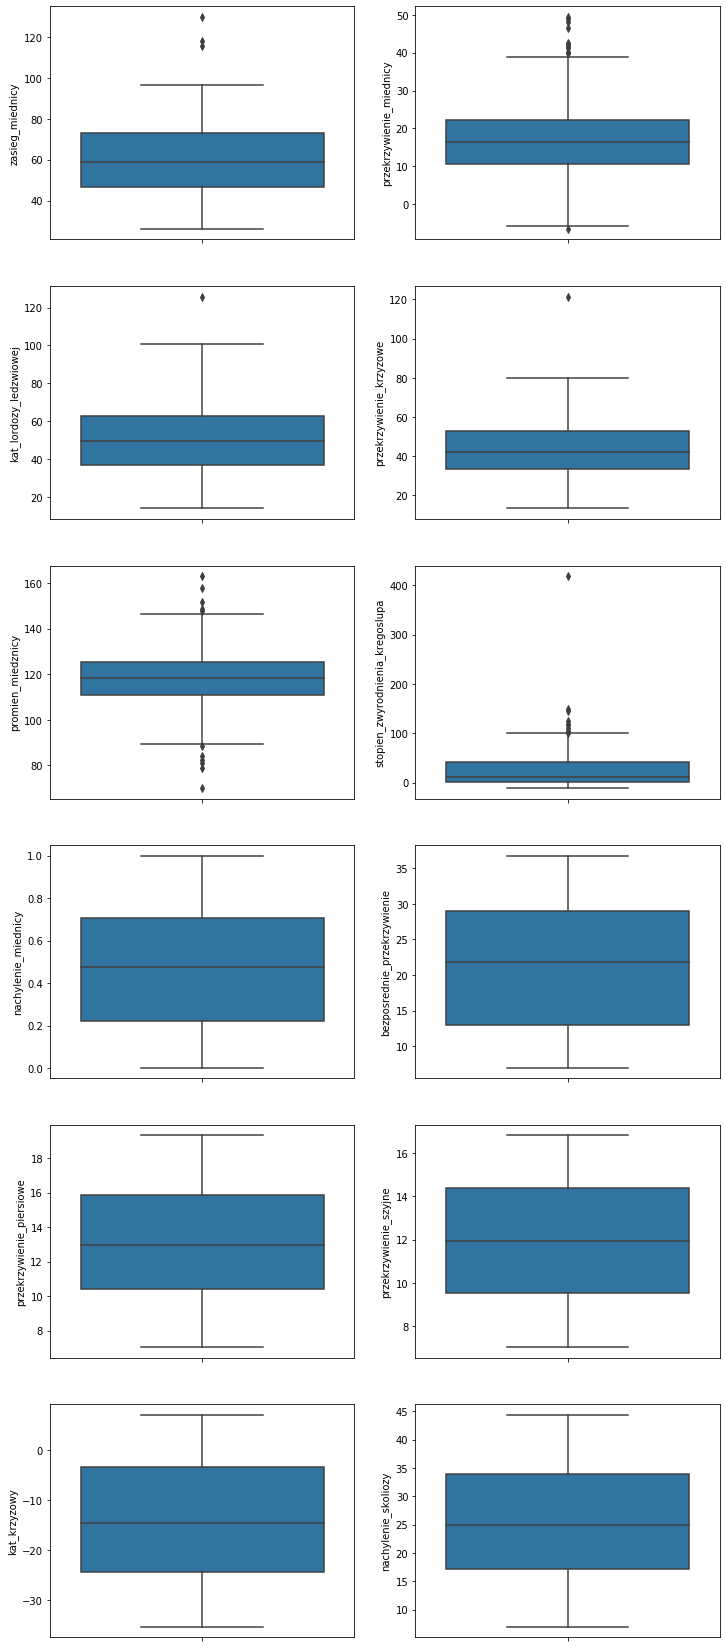

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(12,30))
sns.boxplot(data = df, y= 'zasieg_miednicy', ax=axes[0,0])
sns.boxplot(data = df, y= 'przekrzywienie_miednicy', ax=axes[0,1])
sns.boxplot(data = df, y= 'kat_lordozy_ledzwiowej', ax=axes[1,0])
sns.boxplot(data = df, y= 'przekrzywienie_krzyzowe', ax=axes[1,1])
sns.boxplot(data = df, y= 'promien_miedznicy', ax=axes[2,0])
sns.boxplot(data = df, y= 'stopien_zwyrodnienia_kregoslupa', ax=axes[2,1])
sns.boxplot(data = df, y= 'nachylenie_miednicy', ax=axes[3,0])
sns.boxplot(data = df, y= 'bezposrednie_przekrzywienie', ax=axes[3,1])
sns.boxplot(data = df, y= 'przekrzywienie_piersiowe', ax=axes[4,0])
sns.boxplot(data = df, y= 'przekrzywienie_szyjne', ax=axes[4,1])
sns.boxplot(data = df, y= 'kat_krzyzowy', ax=axes[5,0])
sns.boxplot(data = df, y= 'nachylenie_skoliozy', ax=axes[5,1]);

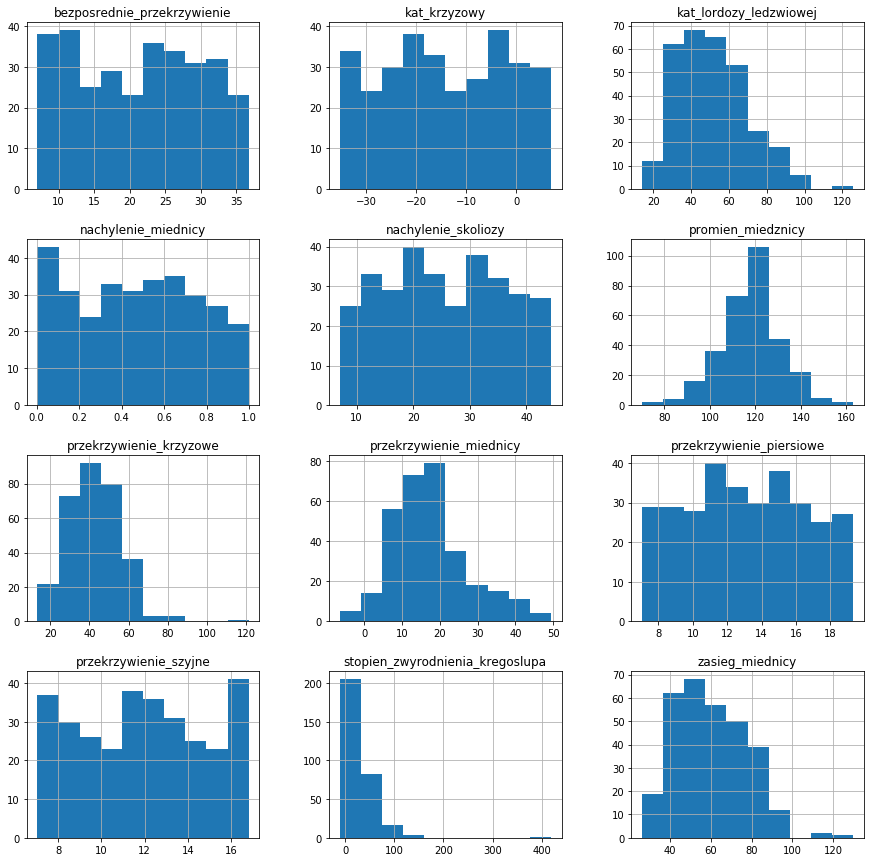

In [25]:
plt.rcParams["figure.figsize"] = [15,15]
df.hist();

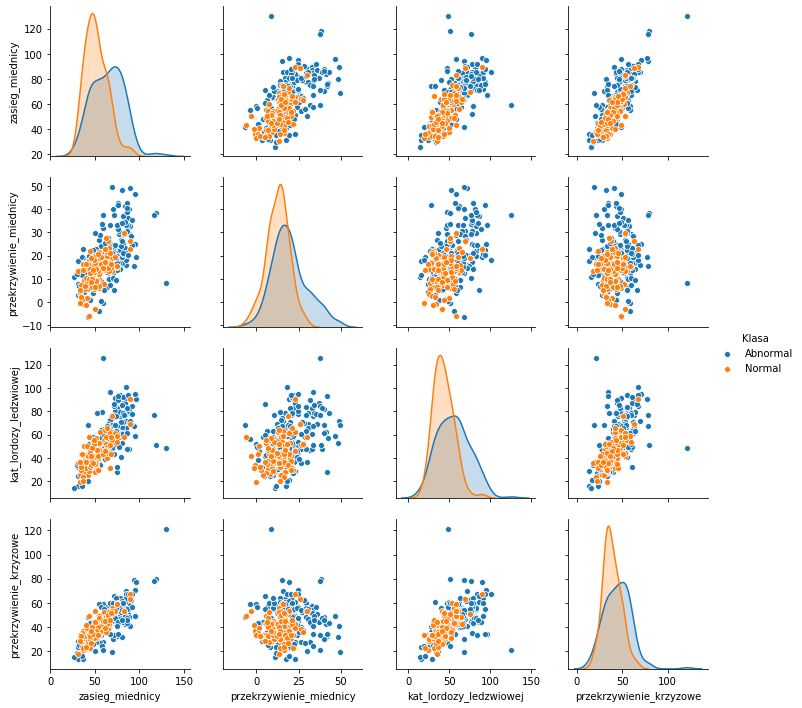

In [26]:
sns.pairplot(df, vars=['zasieg_miednicy','przekrzywienie_miednicy',
                       'kat_lordozy_ledzwiowej', 'przekrzywienie_krzyzowe'], hue='Klasa')

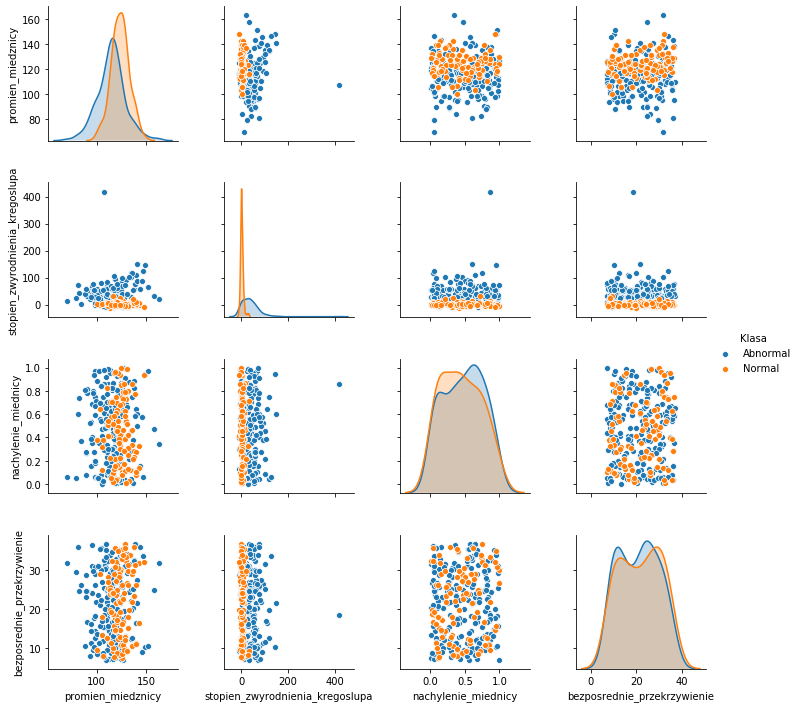

In [27]:
sns.pairplot(df, vars=['promien_miedznicy','stopien_zwyrodnienia_kregoslupa',
                       'nachylenie_miednicy', 'bezposrednie_przekrzywienie'], hue='Klasa')

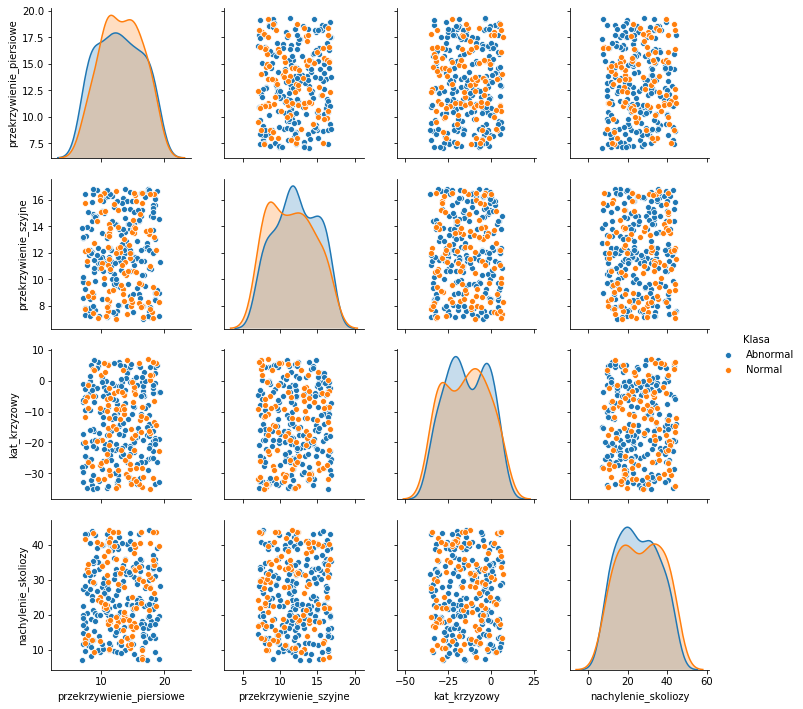

In [28]:
sns.pairplot(df, vars=['przekrzywienie_piersiowe','przekrzywienie_szyjne',
                       'kat_krzyzowy', 'nachylenie_skoliozy'], hue='Klasa');

In [68]:
df[df['Klasa'] == 'Abnormal']

zasieg_miednicy  przekrzywienie_miednicy  kat_lordozy_ledzwiowej  \
0          63.027817                22.552586               39.609117   
1          39.056951                10.060991               25.015378   
2          68.832021                22.218482               50.092194   
3          69.297008                24.652878               44.311238   
4          49.712859                 9.652075               28.317406   
..               ...                      ...                     ...   
205        80.111572                33.942432               85.101608   
206        95.480229                46.550053               59.000000   
207        74.094731                18.823727               76.032156   
208        87.679087                20.365613               93.822416   
209        48.259920                16.417462               36.329137   

     przekrzywienie_krzyzowe  promien_miedznicy  \
0                  40.475232          98.672917   
1                  28.995960         114.405425   
2                  46.613539         105.985135   
3                  44.644130         101.868495   
4                  40.060784         108.168725   
..                       ...                ...   
205                46.169139         125.593624   
206                48.930176          96.683903   
207                55.271004         128.405731   
208                67.313473         120.944829   
209                31.842457          94.882336   

     stopien_zwyrodnienia_kregoslupa  nachylenie_miednicy  \
0                          -0.254400             0.744503   
1                           4.564259             0.415186   
2                          -3.530317             0.474889   
3                          11.211523             0.369345   
4                           7.918501             0.543360   
..                               ...                  ...   
205                       100.292107             0.088561   
206                        77.283072             0.778848   
207                        73.388216             0.910886   
208                        76.730629             0.574775   
209                        28.343799             0.388445   

     bezposrednie_przekrzywienie  przekrzywienie_piersiowe  \
0                        12.5661                   14.5386   
1                        12.8874                   17.5323   
2                        26.8343                   17.4861   
3                        23.5603                   12.7074   
4                        35.4940                   15.9546   
..                           ...                       ...   
205                      11.6503                   16.1451   
206                      29.8380                   14.5939   
207                      13.1813                   10.1368   
208                      23.8665                   13.0473   
209                      16.1775                   15.0636   

     przekrzywienie_szyjne  kat_krzyzowy  nachylenie_skoliozy     Klasa  
0                 15.30468    -28.658501              43.5123  Abnormal  
1                 16.78486    -25.530607              16.1102  Abnormal  
2                 16.65897    -29.031888              19.2221  Abnormal  
3                 11.42447    -30.470246              18.8329  Abnormal  
4                  8.87237    -16.378376              24.9171  Abnormal  
..                     ...           ...                  ...       ...  
205                9.69950      4.446480              36.0749  Abnormal  
206               12.22450    -21.695815              38.7849  Abnormal  
207                8.49572     -0.337130              11.6844  Abnormal  
208                9.41012      5.212541              28.6308  Abnormal  
209               13.79474     -8.044644              21.6135  Abnormal  

[210 rows x 13 columns]

### 3. Algorytmy

In [29]:
# podział danych
X = df.drop('Klasa', axis=1)
y = df['Klasa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
seed = 42
punkty = 'accuracy'

modele = []
modele.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
modele.append(('KNN', KNeighborsClassifier()))
modele.append(('CART', DecisionTreeClassifier()))
modele.append(('NB', GaussianNB()))
modele.append(('SVM', SVC(gamma='auto')))
# sprawdzanie modeli
wyniki = []
nazwy = []
for nazwa, model in modele:
    kfold = KFold(n_splits=10, random_state=seed)
    cvs = cross_val_score(model, X_train, y_train, cv=kfold, scoring=punkty)
    wyniki.append(cvs)
    nazwy.append(nazwa)
    wiadomosc = "%s: %f (%f)" % (nazwa, cvs.mean(), cvs.std())
    print(wiadomosc)

LR: 0.815801 (0.087143)
KNN: 0.815584 (0.068426)
CART: 0.727489 (0.065912)
NB: 0.796970 (0.090795)
SVM: 0.650216 (0.066321)


### 4. Prognozowanie

In [32]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
przewidywanie = knn.predict(X_test)
print(accuracy_score(y_test, przewidywanie))
print(confusion_matrix(y_test, przewidywanie))
print(classification_report(y_test, przewidywanie))

0.8279569892473119
[[60  9]
 [ 7 17]]
              precision    recall  f1-score   support

    Abnormal       0.90      0.87      0.88        69
      Normal       0.65      0.71      0.68        24

    accuracy                           0.83        93
   macro avg       0.77      0.79      0.78        93
weighted avg       0.83      0.83      0.83        93



In [33]:
# SVM
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)
przewidywanie = svm.predict(X_test)
print(accuracy_score(y_test, przewidywanie))
print(confusion_matrix(y_test, przewidywanie))
print(classification_report(y_test, przewidywanie))

0.8602150537634409
[[59 10]
 [ 3 21]]
              precision    recall  f1-score   support

    Abnormal       0.95      0.86      0.90        69
      Normal       0.68      0.88      0.76        24

    accuracy                           0.86        93
   macro avg       0.81      0.87      0.83        93
weighted avg       0.88      0.86      0.87        93

